In [2]:
import pandas as pd
wine = pd.read_csv('https://bit.ly/wine_csv_data')
wine.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


위 데이터에서 class가 1이면 화이트 와인, 0이면 레드 와인이다!

In [3]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [4]:
wine.describe()

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


In [5]:
data = wine[['alcohol', 'sugar', 'pH']]
target = wine['class']

In [6]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(data, target, test_size=0.2, random_state=42)
#위 코드에서 설정값을 따로 지정하지 않으면 25%를 테스트 세트로 지정한다. 여기서는 샘플 개수가 충분히 많아서 20%만 지정했다.

In [7]:
print(train_input.shape, test_input.shape)

(5197, 3) (1300, 3)


In [8]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [9]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.7808350971714451
0.7776923076923077


위 LogisticRegression으로 산출한 score의 값은 별로 높지 않다.

In [10]:
print(lr.coef_, lr.intercept_)

[[ 0.51268071  1.67335441 -0.68775646]] [1.81773456]


In [11]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(train_scaled, train_target)
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.996921300750433
0.8546153846153847


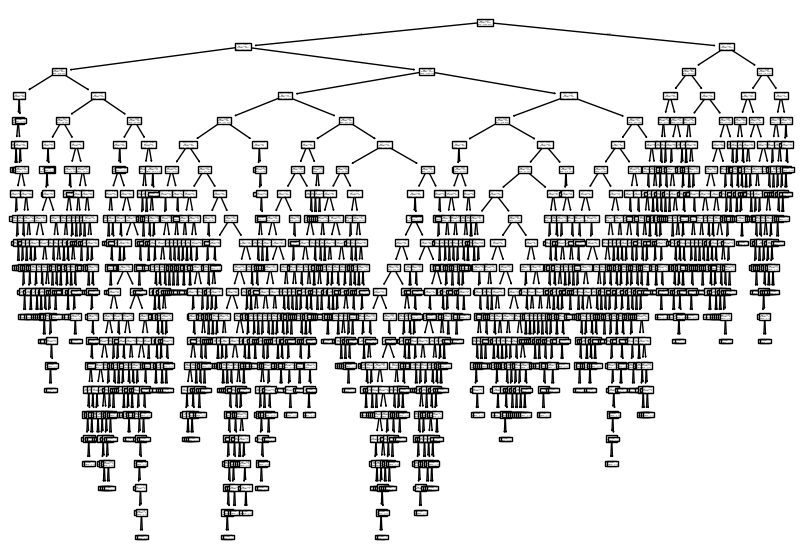

In [12]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(10, 7))
plot_tree(dt)
plt.show()

위 트리는 보다시피 너무 복잡하기에 트리의 깊이를 제한해서 출력해보자! max_depth 매개변수를 1로 주면 루트 노드를 제외하고  
하나의 노드를 더 확장해서 그린다. 또 filled 매개변수에서 클래스에 맞게 노드의  색을 칠할 수 있다. feature_name 매개변수에는  
특성의 이름을 전달할 수 있다. 이렇게 하면 노드가 어떤 특성으로 나뉘는지 좀 더 잘 이해할 수 있다!

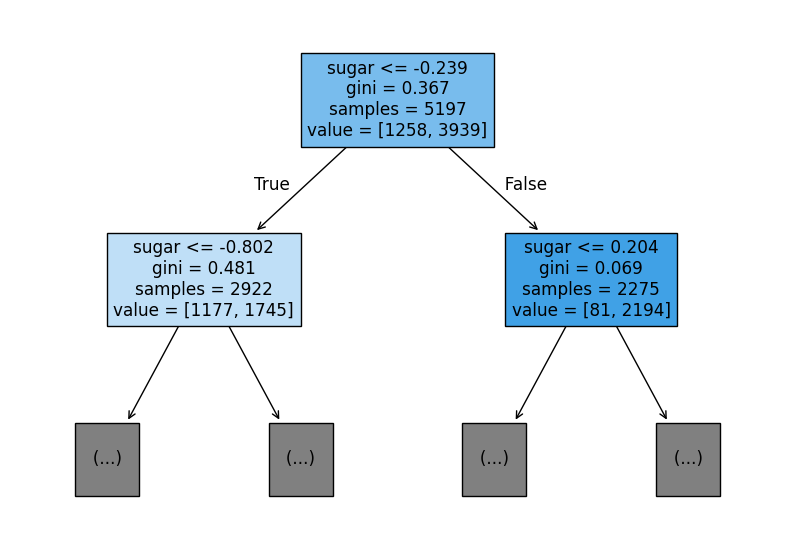

In [13]:
plt.figure(figsize=(10, 7))
plot_tree(dt, max_depth=1, filled = True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

위 트리 그래프에서 맨 위의 sugar는 테스트 조건이고,  
gini는 불순도를 나타내고, sample은 해당 노드에서의 총 샘플 수를 나타낸다.  
value는 이때 클래스 별 샘플 수 를 나타내는데 앞에 있는게 클래스 0이고 뒤에 있는게 클래스 1이다!
왼쪽으로 가면 해당 노드의 조건을 만족한다는 것이고, 오른쪽으로 가면 해당 노드의 조건을 만족하지 않는다는 것임!

### 그럼 여기서 gini는 무엇인가?  
gini는 지니불순도를 의미한다. DecisionTreeClassifier 클래스의 criterion 매개변수의 기본값이 'gini'이다.  
criterion 매개변수의 용도는 노드에서 데이터를 분할할 기준을 정하는 것이다. 앞의 그린 트리에서 루트 노드는 어떻게  
당도 -0.239를 기준으로 왼쪽과 오른쪽 노드를 나누었을까? 바로 criterion 매개변수에 지정한 지니 불순도를 사용했다.  

지니 불순도의 계산법  
- 클래스의 비율을 제곱해서 더한 다음 1에서 뺀다!  

  $지니 불순도 = 1-(음성\;클래스\;비율^{2}+양성\;클래스\;비율^{2})$  

- 루트 노드는 총 5,197개의 샘플이 있고, 그 중에 1,258개가 음성 클래스이고 3,939개가 양성 클래스이다! 따라서  
다음과 같이 지니 불순도를 계산할 수 있다.  
  
  $1-((1258/5197)^{2}+(3939/5197)^{2})=0.367$  

- 만약 어떤 노드의 두 클래스의 비율이 정확히 1/2씩이라면 지니 불순도는 0.5가 되어 최악이 된다.  
  
  $1-((50/100)^{2}+(50/100)^{2})=0.5$  

- 노드에 만약 하나의 클래스만 있다면 지니 불순도는 0이 되고, 이런 노드를 순수노드라고 한다.  
  
  $1-((0/100)^{2}+(100/100)^{2})=0$  

결정 트리 모델은 부모 노드와 자식 노드의 불순도 차이가 가능한 크도록 트리를 성장시칸다. 부모 노드와 자식 노드의  
불순도 차이를 계산하는 방법은???  
  
  $부모의\;불순도-(왼쪽\;노드\;샘플\;수/부모의\;샘플\;수\times 왼쪽\;노드\;불순도-(오른쪽\;노드\;샘플\;수/부모의\;샘플\;수)\times 오른쪽\;노드\;불순도=0.367-(2922/5197)\times0.481-(2275/5197)\times 0.069)=0.066$

이렇게 부모와 자식 노드 사이의 불순도 차이를 정보 이득이라고 부른다! 그리고 결정 트리 모델은 이 정보 이득이  
가능한 크도록 트리를 성장시킨다.

DecisionTreeClassifier 클래스에서 criterion='entropy'를 지정하여 엔트로피 불순도를 사용할 수 있다.  
엔트로피 불순도도 노드의 클래스 비율을 사용하지만 지니 불순도처럼 제곱이 아니라 밑이 2인 로그를 사용하여  
곱한다. 예를 들어 루트 노드의 엔트로피 불순도는 아래와 같은 수식으로 계산할 수 있다.  
- $음성\;클래스\;비율\times log_{2}j(음성\;클래스\;비율)-양성\;클래스\;비율\times log_{2}j(양성\;클래스\;비율)$  
  $=-(1258/5197)\times log_{2}(1258/5197)-(3939/5197)\times log_{2} (3939/5197) = 0.798$  
  $0.798$이 엔트로피 불순도이다.

In [14]:
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_scaled, train_target)
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.8454877814123533
0.8415384615384616


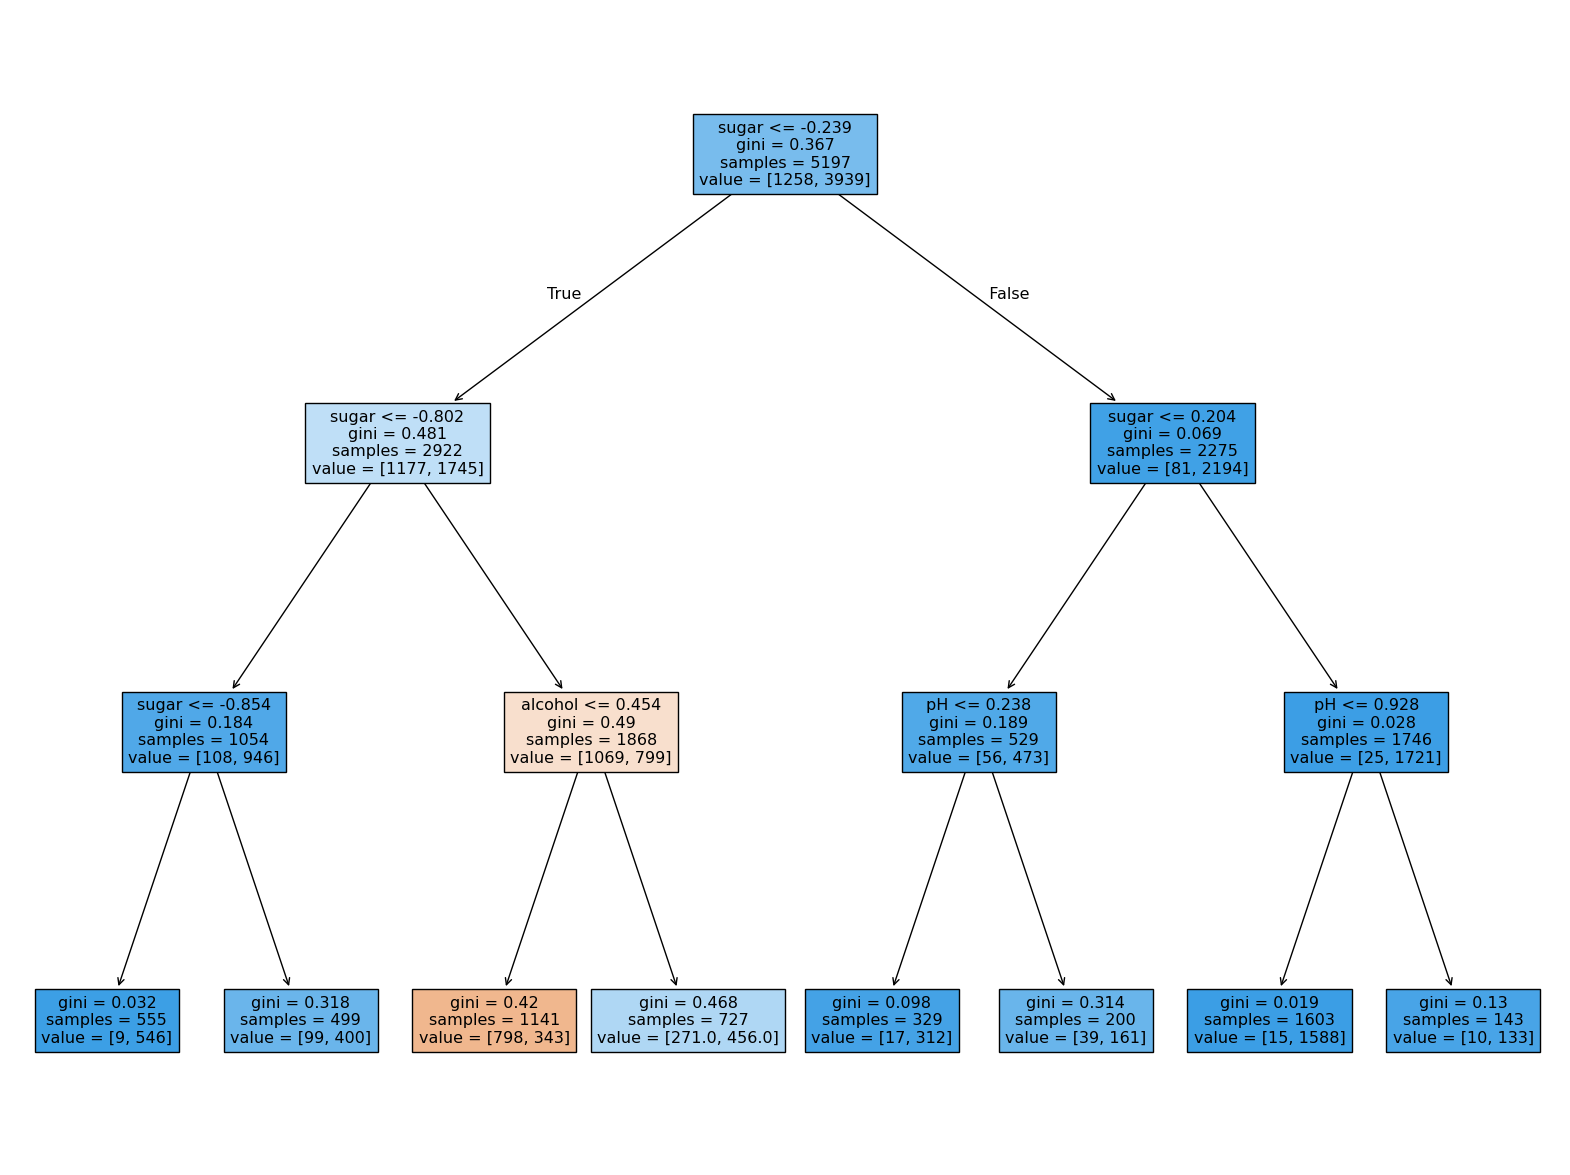

In [15]:
plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

In [16]:
dt=DecisionTreeClassifier(max_depth=3,random_state=42)
dt.fit(train_input, train_target)
print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))

0.8454877814123533
0.8415384615384616


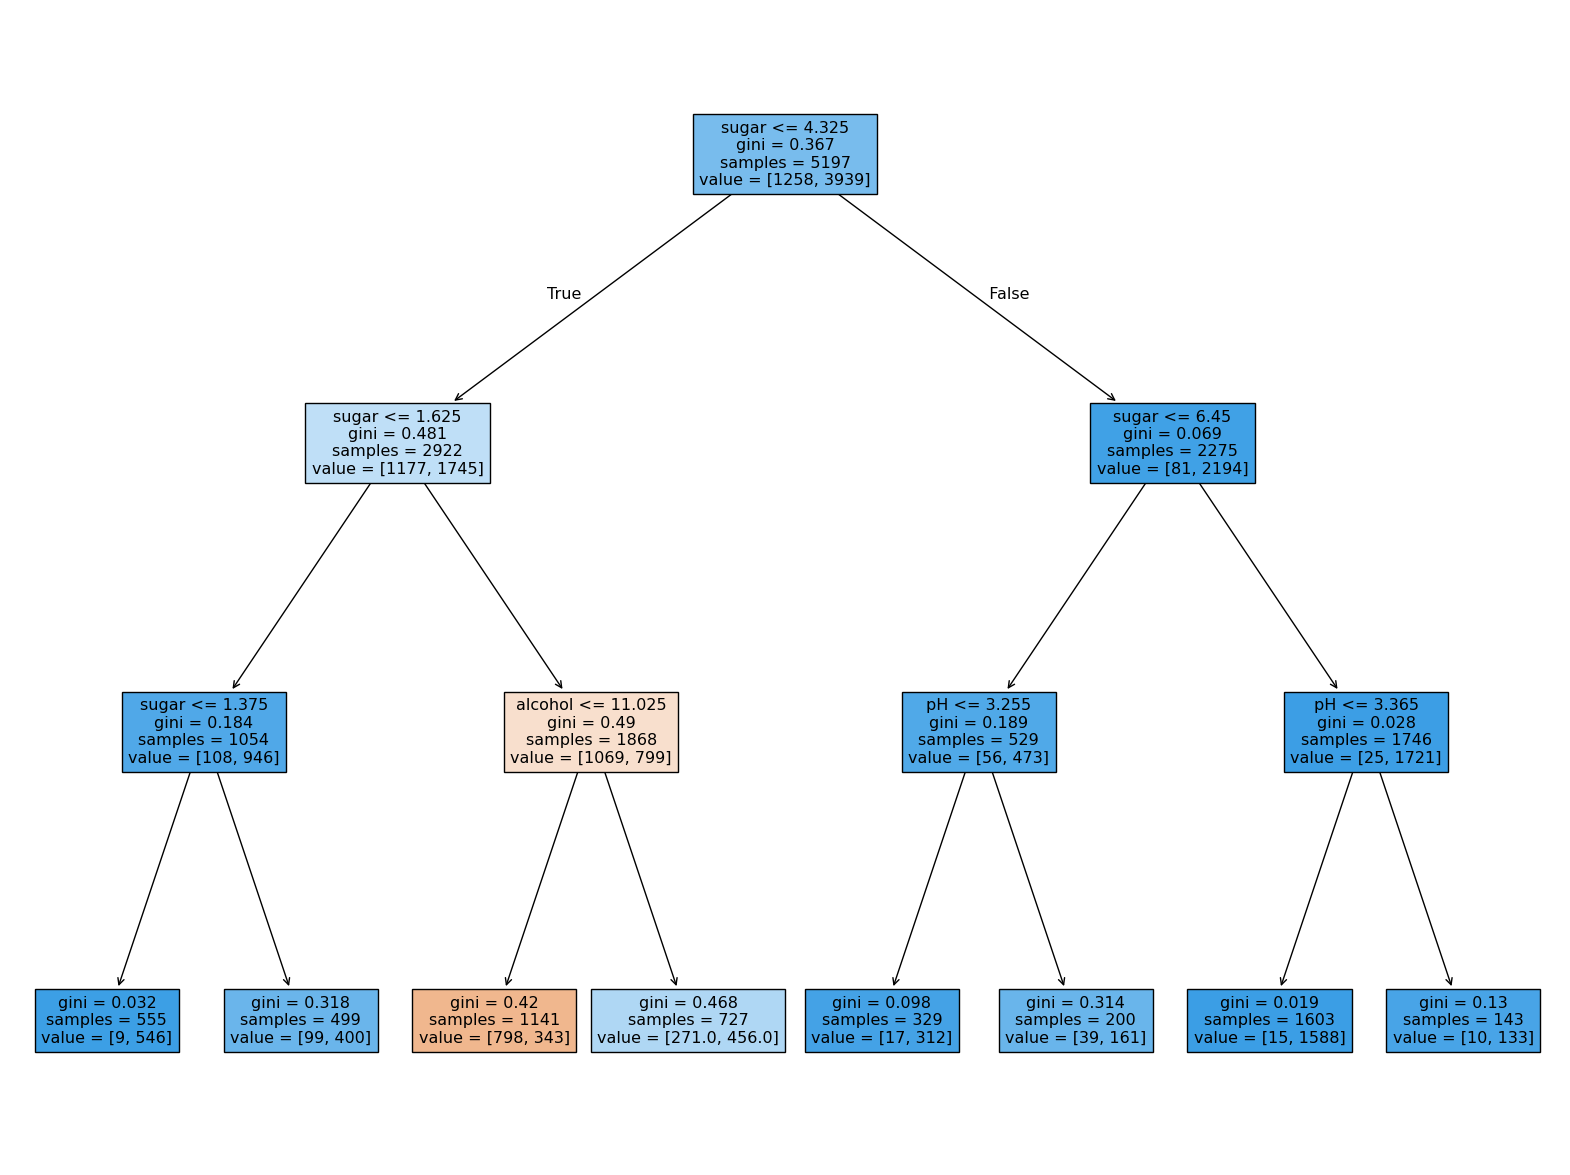

In [17]:
plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

In [18]:
print(dt.feature_importances_) # 각 특성별로 중요도를 백분율로 나타낸 것! 여기서는 2번째인 설탕이 가장 영향력이 크다는 사실을 알 수 있다!

[0.12345626 0.86862934 0.0079144 ]


위의 특성 중요도는 각 노드의 정보 이득과 전체 샘플에 대한 비율을 곱한 후 특성별로 더하여 계산한다. 특성 중요도를 활용하면 결정 트리 모델을 특성 선택에 활용할 수 있다. 이것이 결정 트리 알고리즘의 또 다른 장점 중 하나이다!  

앞서 결정 트리 예제에서는 max_depth를 3으로 지정하여 좌우가 대칭인 트리를 만들었다.  
사이킷런의 결정 트리 클래스가 제공하는 매개변수 중에서 min_impurity_decrease를 사용해 가지치기를 해보자!  
어떤 노드의 $정보\;이득 \times (노드의\;샘플\;수) / (전체\;샘플\;수)$ 값이 이 매개변수보다 작으면 더 이상 분할하지 않음!  
이 매개변수의 값을 0.0005로 지정하는 결정 트리를 만들어 봐라!  

0.8874350586877044
0.8615384615384616


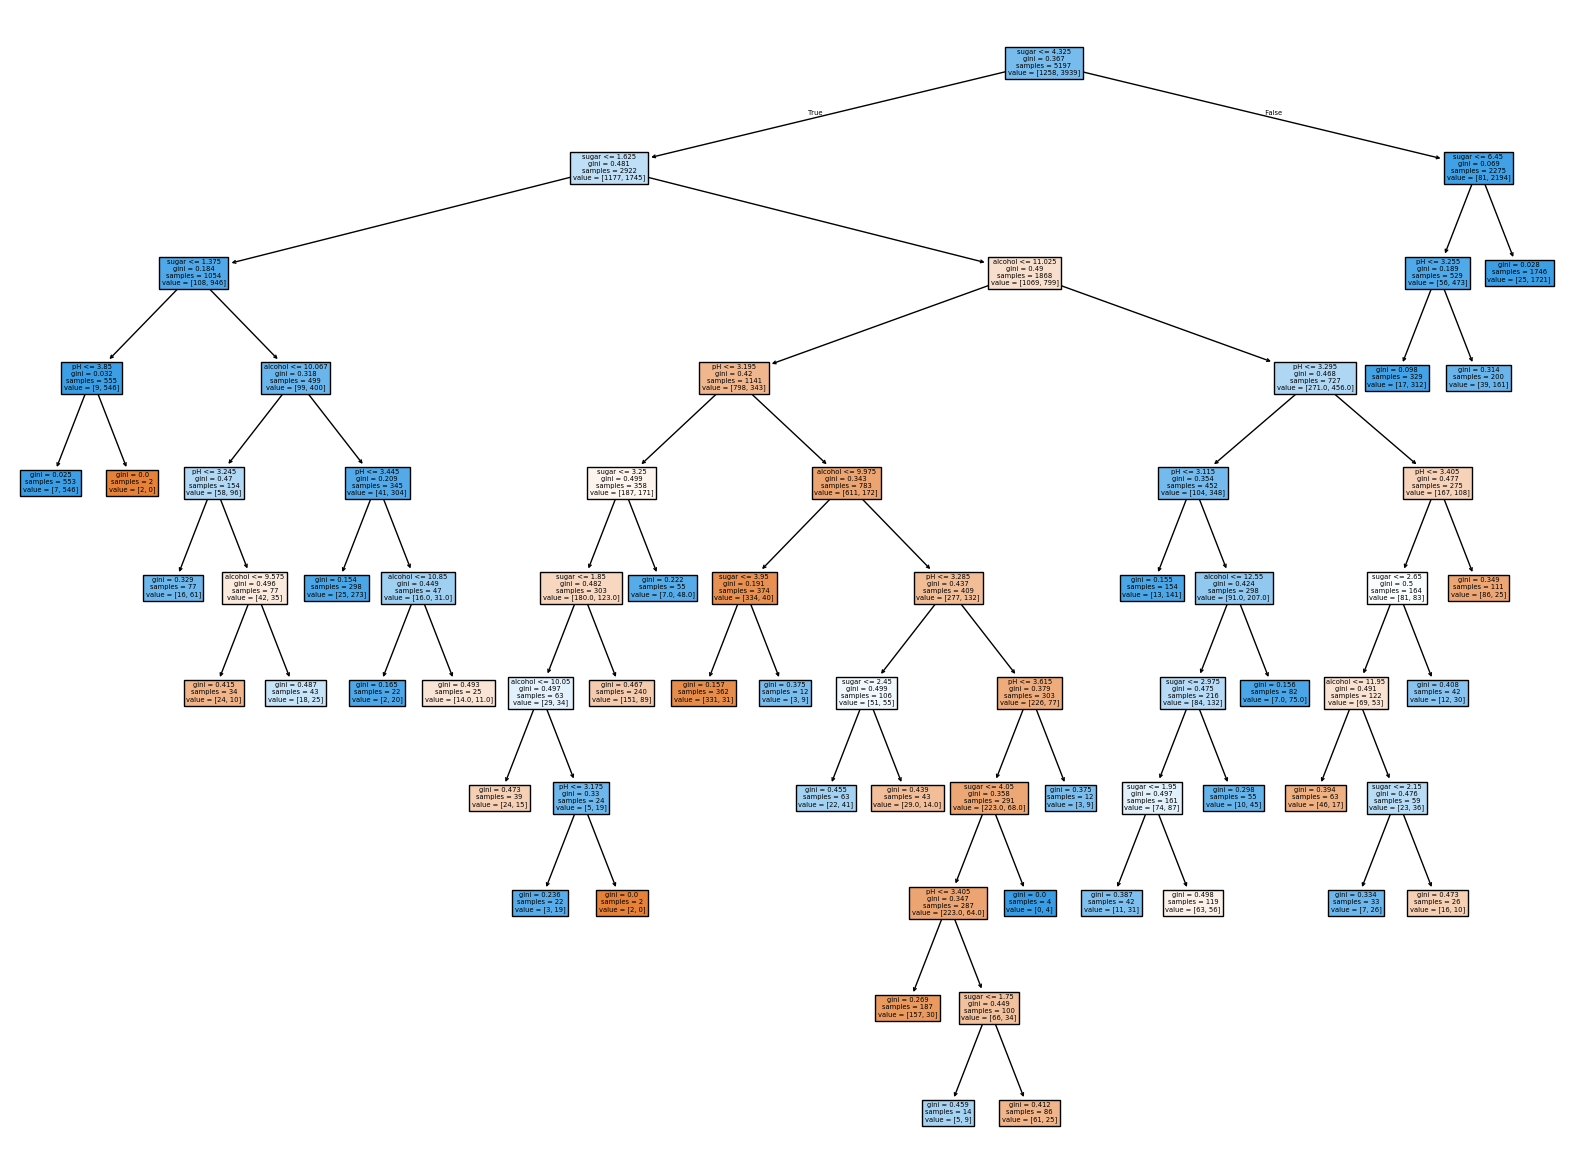

In [19]:
dt = DecisionTreeClassifier(min_impurity_decrease=0.0005, random_state=42)
dt.fit(train_input, train_target)
print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))
plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

## 교차 검증과 그리드 서치!  

In [20]:
import pandas as pd
wine = pd.read_csv('https://bit.ly/wine_csv_data')

In [21]:
data = wine[['alcohol', 'sugar', 'pH']]
target = wine['class']

In [22]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(data, target, test_size=0.2, random_state=42)
sub_input, val_input, sub_target, val_target = train_test_split(train_input, train_target, test_size=0.2, random_state=42)
print(sub_input.shape, val_input.shape)

(4157, 3) (1040, 3)


In [23]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(sub_input, sub_target)
print(dt.score(sub_input, sub_target))
print(dt.score(val_input, val_target))

0.9971133028626413
0.864423076923077


교차 검증(cross-validation) 사용 시 안정적인 검증 점수를 얻고 훈련에 더 많은 데이터를  
사용할 수 있다. 교차 검증은 검증 세트를 떼어 내어 평가하는 과정을 여러 번 반복합니다.  
그 다음 이 점수를 평균하여 최종 검증 점수를 얻는다!  
흔히 말하는 K-fold cross validation이 여기에 해당한다.  
즉, 훈련 세트를 K개로 나눠서 각각의 세트를 한번씩 검증 세트로 이용하고 나머지는 훈련 세트로  
활용하는 방법임!

In [24]:
from sklearn.model_selection import cross_validate
scores = cross_validate(dt, train_input, train_target)
print(scores)

{'fit_time': array([0.01556063, 0.01214123, 0.01061249, 0.00701094, 0.00672626]), 'score_time': array([0.00265121, 0.00191426, 0.0011754 , 0.00115108, 0.00114107]), 'test_score': array([0.86923077, 0.84615385, 0.87680462, 0.84889317, 0.83541867])}


위 코드에서 ```scores```는 fit_time, score_time, test_score 키를 가진 딕셔너리를 반환한다. 처음 2개의 키는 각각의  
모델을 훈련하는 시간과 검증하는 시간을 의미한다. 각 키마다 5개의 숫자가 담겨있는데 이를 통해, cross-validate함수가   
기본적으로 5-fold cross validation을 수행함을 알 수 있다!

In [25]:
import numpy as np
print(np.mean(scores['test_score'])) # 이름은 test score지만 검증 폴드의 점수이다! 혼동하면 안된다!

0.855300214703487


한가지 주의할 점은 cross_validate()는 훈련 세트를 섞어 폴드를 나누지 않는다! 앞서 우리는 train_test_split()에서  
전체 데이터를 섞은 후 훈련 세트를 준비했기 때문에 따로 섞을 필요가 없었다. 하지만 만약 교차 검증을 할 때 훈련세트를  
섞으려면 분할기를 지정해야한다!

In [26]:
from sklearn.model_selection import StratifiedKFold
scores = cross_validate(dt, train_input, train_target, cv=StratifiedKFold())
print(np.mean(scores['test_score']))

0.855300214703487


In [27]:
from sklearn.model_selection import StratifiedKFold
scores = cross_validate(dt, train_input, train_target, cv=StratifiedKFold())
print(np.mean(scores['test_score']))

0.855300214703487


In [28]:
splitter = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_validate(dt, train_input, train_target, cv=splitter)
print(np.mean(scores['test_score']))

0.8574181117533719


In [29]:
from sklearn.model_selection import GridSearchCV
params = {'min_impurity_decrease': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005]}

In [30]:
gs = GridSearchCV(DecisionTreeClassifier(random_state=42), params, n_jobs=1)

In [31]:
gs.fit(train_input, train_target)

,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",DecisionTreeC...ndom_state=42)
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'min_impurity_decrease': [0.0001, 0.0002, ...]}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",None
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",1
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",None
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation time for each fold and parameter candidate is displayed;- >2 : the score is also displayed;- >3 : the fol

In [32]:
dt = gs.best_estimator_
print(dt.score(train_input, train_target))

0.9615162593804117


In [33]:
print(gs.best_params_)

{'min_impurity_decrease': 0.0001}


In [34]:
print(gs.cv_results_['mean_test_score'])

[0.86819297 0.86453617 0.86492226 0.86780891 0.86761605]


In [35]:
print(gs.cv_results_['params'][gs.best_index_])

{'min_impurity_decrease': 0.0001}


In [36]:
params = {'min_impurity_decrease': np.arange(0.0001, 0.001, 0.0001),
          'max_depth' : range(5, 20, 1),
          'min_samples_split' : range(2, 100, 10)
          }

In [37]:
gs = GridSearchCV(DecisionTreeClassifier(random_state=42), params, n_jobs=-1)
gs.fit(train_input, train_target)

,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",DecisionTreeC...ndom_state=42)
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'max_depth': range(5, 20), 'min_impurity_decrease': array([0.0001... 0.0009]), 'min_samples_split': range(2, 100, 10)}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",None
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",-1
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",None
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation time for each fold and parameter 

In [38]:
print(gs.best_params_)

{'max_depth': 14, 'min_impurity_decrease': np.float64(0.0004), 'min_samples_split': 12}


In [39]:
print(np.max(gs.cv_results_['mean_test_score']))

0.8683865773302731


랜덤서치에서는 매개변수의 값이 수치일 때 값의 범위나 간격을 미리 정하기 어려울 수 있다.  
또 너무 많은 매개벼수 조건이 있어 그리드 서치 수행 시간이 오래 걸릴 수 있다. 이럴 때 랜덤 서치를 사용하면 좋다!  
랜덤 서치에는 매개변수 값의 목록을 전달하는 것이 아니라 매개변수를 샘플링할 수 있는 확률 분포 객체를 전달한다.

In [40]:
from scipy.stats import uniform, randint
# stats 서브 패키지의 uniform과 randint 클래스는 모두 주어진 범위에서 고르게 값을 뽑는다! 이를 균등 분포에서 샘플링한다고 함!
rgen = randint(0, 10)
rgen.rvs(10)

array([0, 3, 9, 7, 5, 9, 4, 3, 6, 5])

In [41]:
np.unique(rgen.rvs(1000), return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([ 91,  92, 102, 114,  83, 112, 114,  87,  89, 116]))

In [42]:
ugen = uniform(0,1)
ugen.rvs(10)

array([0.94710692, 0.69981835, 0.73951146, 0.91761132, 0.45896356,
       0.30422911, 0.74426151, 0.4676934 , 0.45675886, 0.73600066])

In [43]:
params = {'min_impurity_decrease': uniform(0.0001, 0.001),
          'max_depth': randint(20, 50),
          'min_samples_leaf': randint(1, 25),
}

In [44]:
from sklearn.model_selection import RandomizedSearchCV
rs = RandomizedSearchCV(DecisionTreeClassifier(random_state=42), params,
                        n_iter=100, n_jobs=-1, random_state=42)
rs.fit(train_input, train_target)

,"estimator estimator: estimator objectAn object of that type is instantiated for each grid point.This is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",DecisionTreeC...ndom_state=42)
,"param_distributions param_distributions: dict or list of dictsDictionary with parameters names (`str`) as keys and distributionsor lists of parameters to try. Distributions must provide a ``rvs``method for sampling (such as those from scipy.stats.distributions).If a list is given, it is sampled uniformly.If a list of dicts is given, first a dict is sampled uniformly, andthen a parameter is sampled using that dict as above.","{'max_depth': <scipy.stats....x7fe8359a1d10>, 'min_impurity_decrease': <scipy.stats....x7fe8359a20d0>, 'min_samples_leaf': <scipy.stats....x7fe8359a1bd0>}"
,"n_iter n_iter: int, default=10Number of parameter settings that are sampled. n_iter tradesoff runtime vs quality of the solution.",100
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.If None, the estimator's score method is used.",None
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",-1
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given the ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``RandomizedSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies tha

In [45]:
print(rs.best_params_)

{'max_depth': 36, 'min_impurity_decrease': np.float64(0.00041435598107632666), 'min_samples_leaf': 4}


In [46]:
print(np.max(rs.cv_results_['mean_test_score']))

0.8697336566224921


In [47]:
dt = rs.best_estimator_
print(dt.score(test_input, test_target))

0.8592307692307692


In [49]:
from sklearn.model_selection import RandomizedSearchCV
rs = RandomizedSearchCV(DecisionTreeClassifier(random_state=42, splitter='random'), params,
                        n_iter=100, n_jobs=-1, random_state=42)
rs.fit(train_input, train_target)

,"estimator estimator: estimator objectAn object of that type is instantiated for each grid point.This is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",DecisionTreeC...tter='random')
,"param_distributions param_distributions: dict or list of dictsDictionary with parameters names (`str`) as keys and distributionsor lists of parameters to try. Distributions must provide a ``rvs``method for sampling (such as those from scipy.stats.distributions).If a list is given, it is sampled uniformly.If a list of dicts is given, first a dict is sampled uniformly, andthen a parameter is sampled using that dict as above.","{'max_depth': <scipy.stats....x7fe8359a1d10>, 'min_impurity_decrease': <scipy.stats....x7fe8359a20d0>, 'min_samples_leaf': <scipy.stats....x7fe8359a1bd0>}"
,"n_iter n_iter: int, default=10Number of parameter settings that are sampled. n_iter tradesoff runtime vs quality of the solution.",100
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.If None, the estimator's score method is used.",None
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",-1
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given the ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``RandomizedSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies tha

In [51]:
print(np.max(rs.cv_results_['mean_test_score']))

0.8528041015769601


In [52]:
dt = rs.best_estimator_
print(dt.score(test_input, test_target))

0.7884615384615384


위의 코드에서 splitter='random' 매개변수를 추가하고 다시 훈련하니 오히려 성능이 낮아졌다!  
이때, splitter의 default 값은 'best'로 각 노드에서 최선의 분할을 찾는다.

### 5-3 앙상블 학습  
정형 데이터를 다루는데 가장 뛰어난 성과를 내는 알고리즘이 앙상블 학습이다!  
이 알고리즘은 대부분 결정트리를 기반으로 만들어짐!  
Random forest는 앙상블 학습의 대표 주자 중 하나로 안정적인 성능 덕분에 널리 사용됨!!  
이름 자체로 유추할 수 있듯이 랜덤 포레스트는 결정 트리를 랜덤하게 만들어 결정 트리의 숲을 만든다!  
그리고 각 결정트리의 예측을 사용해 최종 예측을 만든다.

이때 데이터를 만드는 방법이 독특한데 입력한 훈련 데이터에서 랜덤하게 샘플을 추출하여 훈련 데이터를 만듦.  
이렇게 만든 훈련 데이터에서 한 샘플이 중복되어 추출될 수 있다!  
예를 들어) 1000개의 샘플이 들어있는 가방에서 100개의 샘플을 추출할때, 먼저 1개를 뽑고, 뽑았던 1개를 다시 가방에  
넣는다! 이런 식으로 계속해서 100개의 가방을 뽑으면 중복된 샘플을 당연히 뽑을 수 있다. 그리고 이렇게 만들어진  
샘플을 bootstrap sample이라고 부른다. 기본적으로 부트스트랩 샘플은 훈련 세트의 크기와 같게 만듦!  
즉, 1000개의 샘플이 있는 가방에서 중복해서 1000개의 샘플을 뽑는 것이라는 말임

각 노드 분할 시에 전체 특성 중에서 일부 특성을 무작위로 고른 다음 이 중에서 최선의 분할을 찾는다.  
분류 모델인 RandomForestClassifier는 기본적으로 전체 특성 개수의 제곱근만큼의 특성을 선택한다.  
즉 4개의 특성이 있다면 노드마다 2개를 랜덤하게 선택하여 사용한다는 뜻임!  
다만 회귀 모델인 RandomForestRegressor는 전체 특성을 사용한다!

In [53]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
wine = pd.read_csv('https://bit.ly/wine_csv_data')
data = wine[['alcohol', 'sugar', 'pH']]
target = wine['class']
train_input, test_input, train_target, test_target = train_test_split(data, target, test_size=0.2, random_state=42)

In [55]:
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_jobs=-1,random_state=42)
scores = cross_validate(rf, train_input, train_target, return_train_score=True, n_jobs=-1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9973541965122431 0.8905151032797809


Randomforest는 결정 트리의 앙상블이기에 DecisionTreeClassifier가 제공하는 중요한 매개변수를 모두 제공한다.  
criterion, max_depth, max_features, min_samples_split, min_impurity_decrease, min_samples_leaf 등이  
있다. 또한 결정 트리의 큰 장점 중 하나인 특성 중요도를 계산한다. 여기서 랜덤 포레스트의 특성 중요도는 각 결정트리의 특성 중요도를 취합한 것이다. 앞의 랜덤 포레스트 모델을 훈련 세트에 훈련한 후 특성 중요도를 출력하는 코드가 아래에 있다!

In [56]:
rf.fit(train_input, train_target)
print(rf.feature_importances_)

[0.23167441 0.50039841 0.26792718]


위 결과를 앞의 DecisionTree와 비교해보면 여전히 sugar의 중요도가 가장 중요하지만 다른 특성의 중요도가 조금씩 상승했는데 이런 이유는 랜덤포레스트가 일부를 랜덤하게 선택하여 결정 트리를 훈련하기 때문이다.   
이러한 특성은 랜덤포레스트 적용시에 과대적합을 줄이고 일반화 성능을 높이는데 도움이 된다는 뜻이다!

랜덤 포레스트의 재미있는 기능 하나! 그것은 바로 자체적으로 모델을 평가하는 점수를 얻을 수 있다는 것이다!  
이때 부트스트랩 샘플에 포함되지 않고 남는 샘플이 있다는 사실인데 이런 샘플을 OOB(Out Of Bag) 샘플이라고 한다.  
이 남는 샘플을 사용해서 부트스르랩 샘플로 훈련한 결정 트리를 평가할 수 있습니다! 마치 검증 세트의 역할을 하는 것이다!

In [58]:
rf = RandomForestClassifier(oob_score=True, n_jobs=-1, random_state=42)
rf.fit(train_input, train_target)
print(rf.oob_score_)

0.8934000384837406


위 코드의 결과는 교차 검증에서 얻은 점수와 매우 비슷한 점수를 얻을 수 있었다!  
OOB 점수를 사용하면 교차 검증을 대신할 수 있어서 결과적으로 훈련 세트에 더 많은 샘플을 사용할 수 있다!

In [59]:
# 이번에는 Extra Tree라는 랜덤 포레스트와 매우 비슷하게 동작하는 앙상블 모델을 만들어보자!
# 이 엑스트라 트리는 부트스트랩 샘플을 사용하지 않는다는 점에서 기존 랜덤포레스트와 다르다! 
# 대신 노드를 분할할때 가장 좋은 분할을 찾는 것이 아니라 무작위로 분할한다!
 
from sklearn.ensemble import ExtraTreesClassifier
et = ExtraTreesClassifier(n_jobs=-1, random_state=42)
scores = cross_validate(et, train_input, train_target, return_train_score=True, n_jobs=-1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))


0.9974503966084433 0.8887848893166506


In [60]:
et.fit(train_input, train_target)
print(et.feature_importances_)

[0.20183568 0.52242907 0.27573525]


### Gradient Boosting  
그레이디언트 부스팅은 깊이가 얕은 결정 트리를 사용하여 이전 트리의 오차를 보완하는 방식으로 앙상블을 하는 방법이다!  
사이킷런의 GradientBoostingClassifier는 기본적으로  깊이가 3인 결정 트리를 100개 사용한다!  
깊이가 얕은 결정 트리를 사용하기에 과대적합에 강하고 일반적으로 높은 일반화 성능을 기대할 수 있다!  
그레이디언트라는 이름에서 알 수 있듯이 경사 하강법을 사용하여 트리를 앙상블에 추가한다! 분류에서는  
로지스틱 손실 함수를 사용하고 회귀에서는 평균 제곱 오차 함수를 사용한다.

In [61]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(random_state=42)
scores = cross_validate(gb, train_input, train_target, return_train_score=True, n_jobs=-1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.8881086892152563 0.8720430147331015


거의 완벽하게 과대적합되지 않았다! 그레디언트 부스팅은 결정 트리의 개수를 늘려도 과대적합에 매우 강하다!  
위에서 학습률을 증가시키고, 트리의 개수를 늘리면 조금 더 성능이 향상될 수 있다!

In [62]:
gb = GradientBoostingClassifier(n_estimators=500, learning_rate=0.2, random_state=42)
scores = cross_validate(gb, train_input, train_target, return_train_score=True, n_jobs=-1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9464595437171814 0.8780082549788999


In [63]:
gb.fit(train_input, train_target)
print(gb.feature_importances_)

[0.15887763 0.6799705  0.16115187]


위의 GradientBoosting의 속도와 성능을 더욱 향상한 것이 바로 아래에서 시작되는 히스토그램 기반 그레이디언트 부스팅이다!

### 히스토그램 기반 그레이디언트 부스팅  
정형 데이터를 다루는 머신러닝 알고리즘 중에 가장 인기가 높은 알고리즘이다! 히스토그램 기반 그레이디언트 부스팅은 먼저 입력 특성을 256개의 구간으로 나눕니다. 따라서 노드를 분할할 때 최적의 분할을 매우 빠르게 찾을 수 있다!  
이때 히스토그램 기반 그레이디언트 부스팅은 256개의 구간 중 하나를 떼어 놓고 누락된 값을 위해 사용한다.  
고로 입력에 누락된 특성이 있더라도 이를 따로 전처리할 필요가 없다!

In [64]:
from sklearn.ensemble import HistGradientBoostingClassifier
hgb = HistGradientBoostingClassifier(random_state=42)
scores = cross_validate(hgb, train_input, train_target, return_train_score=True)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9321723946453317 0.8801241948619236


In [65]:
from sklearn.inspection import permutation_importance
hgb.fit(train_input, train_target)
result = permutation_importance(hgb, train_input, train_target, n_repeats=10, random_state=42, n_jobs=-1) # 여기서 n_repeats는 특성 하나를 몇 번씩 바꿔가며 중요도를 측정할지 지정하는 매개변수이다!
print(result.importances_mean)

[0.08876275 0.23438522 0.08027708]


위 출력 결과는 앞에서부터  
특성 중요도, 평균, 표준 편차를 담고 있다.  
평균을 출력해 보면 랜덤 포레스트와 비슷한 비율임을 알 수 있다!

In [66]:
result = permutation_importance(hgb, test_input, test_target, n_repeats=10, random_state=42, n_jobs=-1)
print(result.importances_mean)

[0.05969231 0.20238462 0.049     ]


In [67]:
hgb.score(test_input, test_target)

0.8723076923076923

사이킷런 이외에도 히스토그램 기반 그레이디언트 부스팅 알고리즘이 여럿있다.  
그 중에서 xgboost 라이브러리는 아래와 같이 사용가능하다! 이때 사이킷런의 cross_validate()도 같이  
사용이 가능하다! 

In [68]:
from xgboost import XGBClassifier
xgb = XGBClassifier(tree_method='hist', random_state=42)
scores = cross_validate(xgb, train_input, train_target, return_train_score=True, n_jobs=-1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9567059184812372 0.8783915747390243


xgboost 이외에도 LightGBM이라는 히스토그램 기반 그레이디언트 부스팅 라이브러리가 있다!  
LightGBM은 빠르고 최신 기술을 많이 적용하고 있어서 인기가 점점 높아지고 있다고 함ㅇㅇ  

In [78]:
from lightgbm import LGBMClassifier
# n_jobs를 명시적으로 설정
lgb = LGBMClassifier(random_state=42, n_jobs=4)  # -1 대신 4
scores = cross_validate(lgb, train_input, train_target, 
                       return_train_score=True, n_jobs=4)
print('결과: ',np.mean(scores['train_score']), np.mean(scores['test_score']))

[LightGBM] [Info] Number of positive: 3151, number of negative: 1006
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000106 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 372
[LightGBM] [Info] Number of data points in the train set: 4157, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.757999 -> initscore=1.141738
[LightGBM] [Info] Start training from score 1.141738
[LightGBM] [Info] Number of positive: 3151, number of negative: 1006
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000114 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 370
[LightGBM] [Info] Number of data points in the train set: 4157, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.757999 -> initscore=1.141738
[LightGBM] [Info] Start training from score 1.141738
[LightGBM] [Info] Number o

In [77]:
import os
import psutil

# 방법 1: 물리 코어 수 사용 (추천!)
n_cores = psutil.cpu_count(logical=False)
print(f"물리 코어:  {n_cores}개")  # 8

# 방법 2: 논리 코어 수
n_threads = os.cpu_count()
print(f"논리 코어:  {n_threads}개")  # 16

물리 코어:  32개
논리 코어:  32개
